# Modeling
This notebook contains all steps taken in the modeling phase of the data science pipeline for this project. 
This notebook does rely on helper files so if you want to run the code blocks in this notebook ensure that you have all the helper files in the same directory.
Some comments and markdown cells in this notebook won't match the actual results. This is because the notebook was re-run with many different variations of data and the last one used is not the same as the first.

---
### Required Imports
Everything we need to run the code blocks in this notebook are imported below. To run the code blocks in this report you will need numpy, pandas, matplotlib, seaborn and sklearn installed on your computer.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler

from wrangle import *

import warnings
warnings.filterwarnings('ignore')

---
## Acquire , Prepare and Split Data

Here we will acquire, prepare and split data using the wrangle module.

In [2]:
df = clean_data()
df.head()

,cms_certification_number_(ccn),city,state,county_name,cms_region,condition,number_of_instances,footnote
0,013025,BIRMINGHAM,AL,Jefferson,4,All other conditions,346,0.0
1,013025,BIRMINGHAM,AL,Jefferson,4,Brain disease or condition (non-traumatic),150,0.0
2,013025,BIRMINGHAM,AL,Jefferson,4,Brain injury (traumatic),38,0.0
3,013025,BIRMINGHAM,AL,Jefferson,4,Hip or femur fracture,156,0.0
4,013025,BIRMINGHAM,AL,Jefferson,4,"Hip or knee replacement, amputation or other b...",329,0.0


In [3]:
train, validate, test = wrangle(df)

data has been split
(5931, 69) (2543, 69) (2119, 69)


Verify that the split worked

In [4]:
train

,cms_certification_number_(ccn),city,state,county_name,cms_region,condition,number_of_instances,footnote,state_ak,state_al,...,state_wy,condition_all_other_conditions,condition_brain_disease_or_condition_(non_traumatic),condition_brain_injury_(traumatic),condition_hip_or_femur_fracture,"condition_hip_or_knee_replacement,_amputation_or_other_bone_or_joint_condition",condition_nervous_system_disorder_(excluding_stroke),condition_spinal_cord_disease_or_condition_(non_traumatic),condition_spinal_cord_injury_(traumatic),condition_stroke
6737,36T068,SYLVANIA,OH,Lucas,5,Nervous system disorder (excluding stroke),10,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
8915,45T184,HOUSTON,TX,Harris,6,Nervous system disorder (excluding stroke),29,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
86,01T033,BIRMINGHAM,AL,Jefferson,4,Nervous system disorder (excluding stroke),12,0.0,0,1,...,0,0,0,0,0,0,1,0,0,0
1216,05T438,PASADENA,CA,Los Angeles,9,Brain disease or condition (non-traumatic),10,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
8870,45T119,EDINBURG,TX,Hidalgo,6,Nervous system disorder (excluding stroke),41,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382,293032,HENDERSON,NV,Clark,9,All other conditions,154,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
5102,26T040,SPRINGFIELD,MO,Greene,7,Stroke,47,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
6441,35T006,MINOT,ND,Ward,8,Spinal cord disease or condition (non-traumatic),10,1.0,0,0,...,0,0,0,0,0,0,0,1,0,0
8921,45T193,HOUSTON,TX,Harris,6,Brain injury (traumatic),10,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
train.columns

Index(['cms_certification_number_(ccn)', 'city', 'state', 'county_name',
       'cms_region', 'condition', 'number_of_instances', 'footnote',
       'state_ak', 'state_al', 'state_ar', 'state_az', 'state_ca', 'state_co',
       'state_ct', 'state_dc', 'state_de', 'state_fl', 'state_ga', 'state_hi',
       'state_ia', 'state_id', 'state_il', 'state_in', 'state_ks', 'state_ky',
       'state_la', 'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn',
       'state_mo', 'state_ms', 'state_mt', 'state_nc', 'state_nd', 'state_ne',
       'state_nh', 'state_nj', 'state_nm', 'state_nv', 'state_ny', 'state_oh',
       'state_ok', 'state_or', 'state_pa', 'state_pr', 'state_ri', 'state_sc',
       'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt',
       'state_wa', 'state_wi', 'state_wv', 'state_wy',
       'condition_all_other_conditions',
       'condition_brain_disease_or_condition_(non_traumatic)',
       'condition_brain_injury_(traumatic)', 'condition_hip_or_femu

Check for object columns 

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5931 entries, 6737 to 1233
Data columns (total 69 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   cms_certification_number_(ccn)                                                  5931 non-null   object
 1   city                                                                            5931 non-null   object
 2   state                                                                           5931 non-null   object
 3   county_name                                                                     5931 non-null   object
 4   cms_region                                                                      5931 non-null   object
 5   condition                                                                       5931 non-null   object
 6   number_of_instances  

Remove all object columns to be able to fit them in the model

In [7]:
train.drop(columns=['cms_certification_number_(ccn)', 'city', 'state','county_name', 'condition', 'footnote', 'cms_region'], inplace=True)
validate.drop(columns=['cms_certification_number_(ccn)', 'city', 'state','county_name', 'condition', 'footnote', 'cms_region'], inplace=True)
test.drop(columns=['cms_certification_number_(ccn)', 'city', 'state','county_name', 'condition', 'footnote', 'cms_region'], inplace=True)

Split train into X and y

In [8]:
X_train = train.drop(columns=['number_of_instances'])
y_train = train.number_of_instances

X_validate = validate.drop(columns=['number_of_instances'])
y_validate = validate.number_of_instances

X_test = test.drop(columns=['number_of_instances'])
y_test = test.number_of_instances

### Select K best
Check for the eight best features

In [9]:
f_selector = SelectKBest(f_regression, k=8)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

Display the top 8 features

In [10]:
f_feature

['state_fl',
 'state_ma',
 'state_nj',
 'condition_all_other_conditions',
 'condition_brain_injury_(traumatic)',
 'condition_spinal_cord_disease_or_condition_(non_traumatic)',
 'condition_spinal_cord_injury_(traumatic)',
 'condition_stroke']

Select Kbest to select top 3 features for predicting number of instances 

In [11]:
kbest = SelectKBest(f_regression, k=3)
kbest.fit(X_train, y_train)

SelectKBest(k=3, score_func=<function f_regression at 0x7faa7900d1f0>)

Let's check out the results

In [12]:
kbest_results = pd.DataFrame(dict(p=kbest.pvalues_, f=kbest.scores_), index=X_train.columns)
kbest_results

,p,f
state_ak,1.395159e-01,2.183876
state_al,3.481640e-07,26.021347
state_ar,7.136472e-01,0.134674
state_az,7.856320e-01,0.073984
state_ca,8.736702e-06,19.804141
...,...,...
"condition_hip_or_knee_replacement,_amputation_or_other_bone_or_joint_condition",1.123506e-08,32.707527
condition_nervous_system_disorder_(excluding_stroke),5.222819e-05,16.389458
condition_spinal_cord_disease_or_condition_(non_traumatic),9.169113e-28,120.481575
condition_spinal_cord_injury_(traumatic),1.277457e-49,223.438273


What are the best?

In [13]:
X_train.columns[kbest.get_support()]

Index(['condition_all_other_conditions',
       'condition_spinal_cord_injury_(traumatic)', 'condition_stroke'],
      dtype='object')

Show the dataframe with the top 3

In [14]:
X_train_transformed = pd.DataFrame(
    kbest.transform(X_train),
    index=X_train.index,
    columns=X_train.columns[kbest.get_support()])

X_train_transformed

,condition_all_other_conditions,condition_spinal_cord_injury_(traumatic),condition_stroke
6737,0,0,0
8915,0,0,0
86,0,0,0
1216,0,0,0
8870,0,0,0
...,...,...,...
5382,1,0,0
5102,0,0,1
6441,0,0,0
8921,0,0,0


---
### Create a Baseline
Before we can begin building some models we must establish a baseline

In [15]:
baseline = pd.DataFrame({
    'mean' : [y_train.mean()] * y_train.size
})
baseline.shape


(5931, 1)

In [16]:
print(f'RMSE mean baseline: {mean_squared_error(y_train, baseline["mean"], squared = False)}')

RMSE mean baseline: 53.38885607974989


---
### Creating Models

Top features from KBest

In [17]:
features = ['condition_all_other_conditions', 'condition_spinal_cord_injury_(traumatic)', 'condition_stroke']

Baseline validation

In [18]:
baseline_val = pd.Series([y_train.mean()] * y_validate.size)

Create a results dictionary to hold results of models 

In [19]:
results = {
    'baseline' : {
        'RMSE' : mean_squared_error(y_train, baseline['mean'], squared = False),
        'R^2' : r2_score(y_train, baseline['mean']),
        'RMSE_val' : mean_squared_error(y_validate, baseline_val, squared = False),
        'R^2_val' : r2_score(y_validate, baseline_val)
        }}

<AxesSubplot:xlabel='number_of_instances', ylabel='Count'>

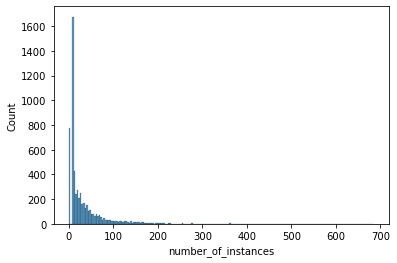

In [20]:
sns.histplot(y_train)

For this distribution we'll try linear regression, polynomial regression, and a tweedie regressor.

### Linear Regresion

In [21]:
model = LinearRegression()
model.fit(X_train[features], y_train)

r2_score(y_train, model.predict(X_train[features]))

0.13000205175742352

In [22]:
mean_squared_error(y_train, model.predict(X_train[features]), squared = False)

49.79775106649881

Add results to the dictionary

In [23]:
results['linear_regression'] = {
    'RMSE' : mean_squared_error(y_train, model.predict(X_train[features]), squared = False),
    'R^2' : r2_score(y_train, model.predict(X_train[features])),
    'RMSE_val' : mean_squared_error(y_validate, model.predict(X_validate[features]), squared = False),
    'R^2_val' : r2_score(y_validate, model.predict(X_validate[features]))
}

### Polynomial Regression

In [24]:
poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = False)
poly.fit(X_train[features])

X_train_poly = pd.DataFrame(
    poly.transform(X_train[features]),
    columns = poly.get_feature_names(X_train[features].columns),
    index = X_train[features].index
)

model = LinearRegression()
model.fit(X_train_poly, y_train)

r2_score(y_train, model.predict(X_train_poly))

0.1299472770949559

In [25]:
mean_squared_error(y_train, model.predict(X_train_poly), squared = False)

49.79931866334211

Preapare X_validate with the polynomial features

In [26]:
poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = False)
poly.fit(X_validate[features])

X_validate_poly = pd.DataFrame(
    poly.transform(X_validate[features]),
    columns = poly.get_feature_names(X_validate[features].columns),
    index = X_validate[features].index
)

In [27]:
results['polynomial_regression'] = {
    'RMSE' : mean_squared_error(y_train, model.predict(X_train_poly), squared = False),
    'R^2' : r2_score(y_train, model.predict(X_train_poly)),
    'RMSE_val' : mean_squared_error(y_validate, model.predict(X_validate_poly), squared = False),
    'R^2_val' : r2_score(y_validate, model.predict(X_validate_poly))}

### Tweedie Regressor

In [28]:
model = TweedieRegressor(power = 0, alpha = 0)
model.fit(X_train[features], y_train)

r2_score(y_train, model.predict(X_train[features]))

0.1300020517543884

In [29]:
mean_squared_error(y_train, model.predict(X_train[features]), squared = False)

49.79775106658567

In [30]:
results['tweedie_regressor'] = {
    'RMSE' : mean_squared_error(y_train, model.predict(X_train[features]), squared = False),
    'R^2' : r2_score(y_train, model.predict(X_train[features])),
    'RMSE_val' : mean_squared_error(y_validate, model.predict(X_validate[features]), squared = False),
    'R^2_val' : r2_score(y_validate, model.predict(X_validate[features]))}

---
### Results

In [31]:
pd.DataFrame(results).T

,RMSE,R^2,RMSE_val,R^2_val
baseline,53.388856,0.000000,54.398349,-0.000055
linear_regression,49.797751,0.130002,51.002399,0.120909
polynomial_regression,49.799319,0.129947,50.997512,0.121078
tweedie_regressor,49.797751,0.130002,51.002398,0.120909


---
### Conclusions
All models performed well. Polynomial regression is the most consistent. 